## Imports

In [48]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA

## Loading Dataset

In [2]:
df = pd.read_csv('online_shoppers_intention.csv')

In [3]:
df.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,1,1,1,1,Returning_Visitor,False,False
1,0,0.0,0,0.0,2,64.000000,0.00,0.10,0.0,0.0,Feb,2,2,1,2,Returning_Visitor,False,False
2,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,4,1,9,3,Returning_Visitor,False,False
3,0,0.0,0,0.0,2,2.666667,0.05,0.14,0.0,0.0,Feb,3,2,2,4,Returning_Visitor,False,False
4,0,0.0,0,0.0,10,627.500000,0.02,0.05,0.0,0.0,Feb,3,3,1,4,Returning_Visitor,True,False


In [4]:
df.OperatingSystems.value_counts()

2    6601
1    2585
3    2555
4     478
8      79
6      19
7       7
5       6
Name: OperatingSystems, dtype: int64

In [5]:
df.Browser.value_counts()

2     7961
1     2462
4      736
5      467
6      174
10     163
8      135
3      105
13      61
7       49
12      10
11       6
9        1
Name: Browser, dtype: int64

In [6]:
df.Region.value_counts()

1    4780
3    2403
4    1182
2    1136
6     805
7     761
9     511
8     434
5     318
Name: Region, dtype: int64

In [7]:
df['Month'].value_counts()

May     3364
Nov     2998
Mar     1907
Dec     1727
Oct      549
Sep      448
Aug      433
Jul      432
June     288
Feb      184
Name: Month, dtype: int64

In [8]:
df['VisitorType'].value_counts()

Returning_Visitor    10551
New_Visitor           1694
Other                   85
Name: VisitorType, dtype: int64

In [9]:
df['Weekend'].value_counts()

False    9462
True     2868
Name: Weekend, dtype: int64

In [10]:
df['Revenue'].value_counts()

False    10422
True      1908
Name: Revenue, dtype: int64

In [11]:
df['TrafficType'].value_counts()

2     3913
1     2451
3     2052
4     1069
13     738
10     450
6      444
8      343
5      260
11     247
20     198
9       42
7       40
15      38
19      17
14      13
18      10
16       3
12       1
17       1
Name: TrafficType, dtype: int64

In [12]:
df.columns

Index(['Administrative', 'Administrative_Duration', 'Informational',
       'Informational_Duration', 'ProductRelated', 'ProductRelated_Duration',
       'BounceRates', 'ExitRates', 'PageValues', 'SpecialDay', 'Month',
       'OperatingSystems', 'Browser', 'Region', 'TrafficType', 'VisitorType',
       'Weekend', 'Revenue'],
      dtype='object')

In [13]:
df.drop(['Revenue','Weekend','VisitorType','Region','Browser','OperatingSystems','Month','SpecialDay','TrafficType'], axis=1, inplace=True)

In [14]:
df.shape

(12330, 9)

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12330 entries, 0 to 12329
Data columns (total 9 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Administrative           12330 non-null  int64  
 1   Administrative_Duration  12330 non-null  float64
 2   Informational            12330 non-null  int64  
 3   Informational_Duration   12330 non-null  float64
 4   ProductRelated           12330 non-null  int64  
 5   ProductRelated_Duration  12330 non-null  float64
 6   BounceRates              12330 non-null  float64
 7   ExitRates                12330 non-null  float64
 8   PageValues               12330 non-null  float64
dtypes: float64(6), int64(3)
memory usage: 867.1 KB


In [16]:
df.columns

Index(['Administrative', 'Administrative_Duration', 'Informational',
       'Informational_Duration', 'ProductRelated', 'ProductRelated_Duration',
       'BounceRates', 'ExitRates', 'PageValues'],
      dtype='object')

### Perform required cleaning to bring the uniformity in the data.



In [17]:
df.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues
0,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0
1,0,0.0,0,0.0,2,64.000000,0.00,0.10,0.0
2,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0
3,0,0.0,0,0.0,2,2.666667,0.05,0.14,0.0
4,0,0.0,0,0.0,10,627.500000,0.02,0.05,0.0


### Carry-out uni-variate, Bi-variate and Multti-varaiate analysis to understand the data relationships.


# Univariate

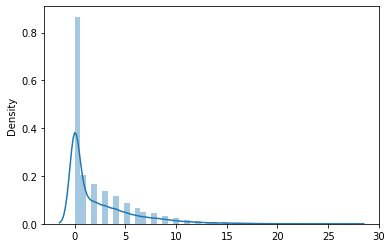

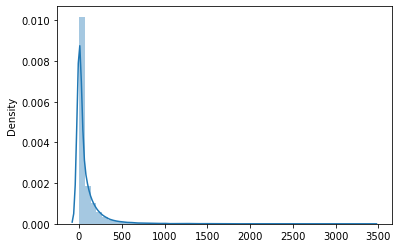

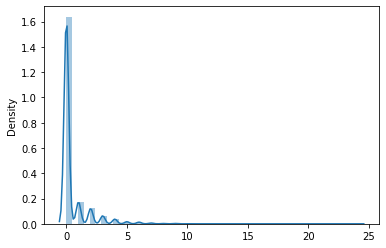

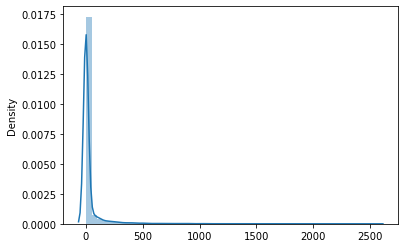

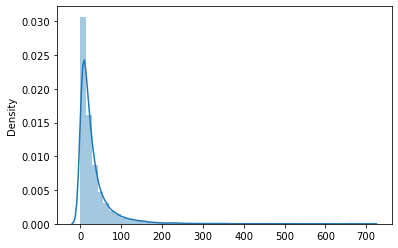

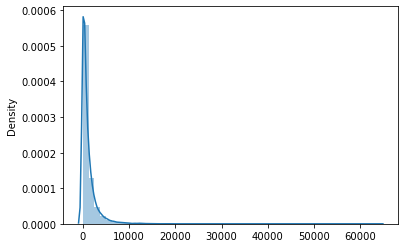

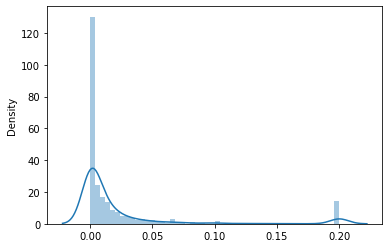

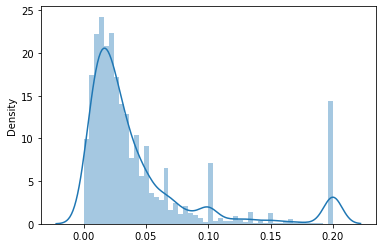

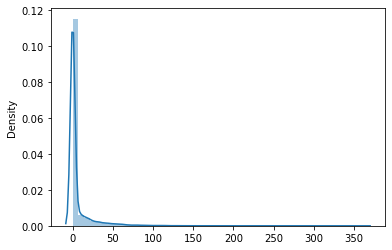

In [18]:
for i in df.columns:
    sns.distplot(x=df[i])
    plt.show()

# Bivariate

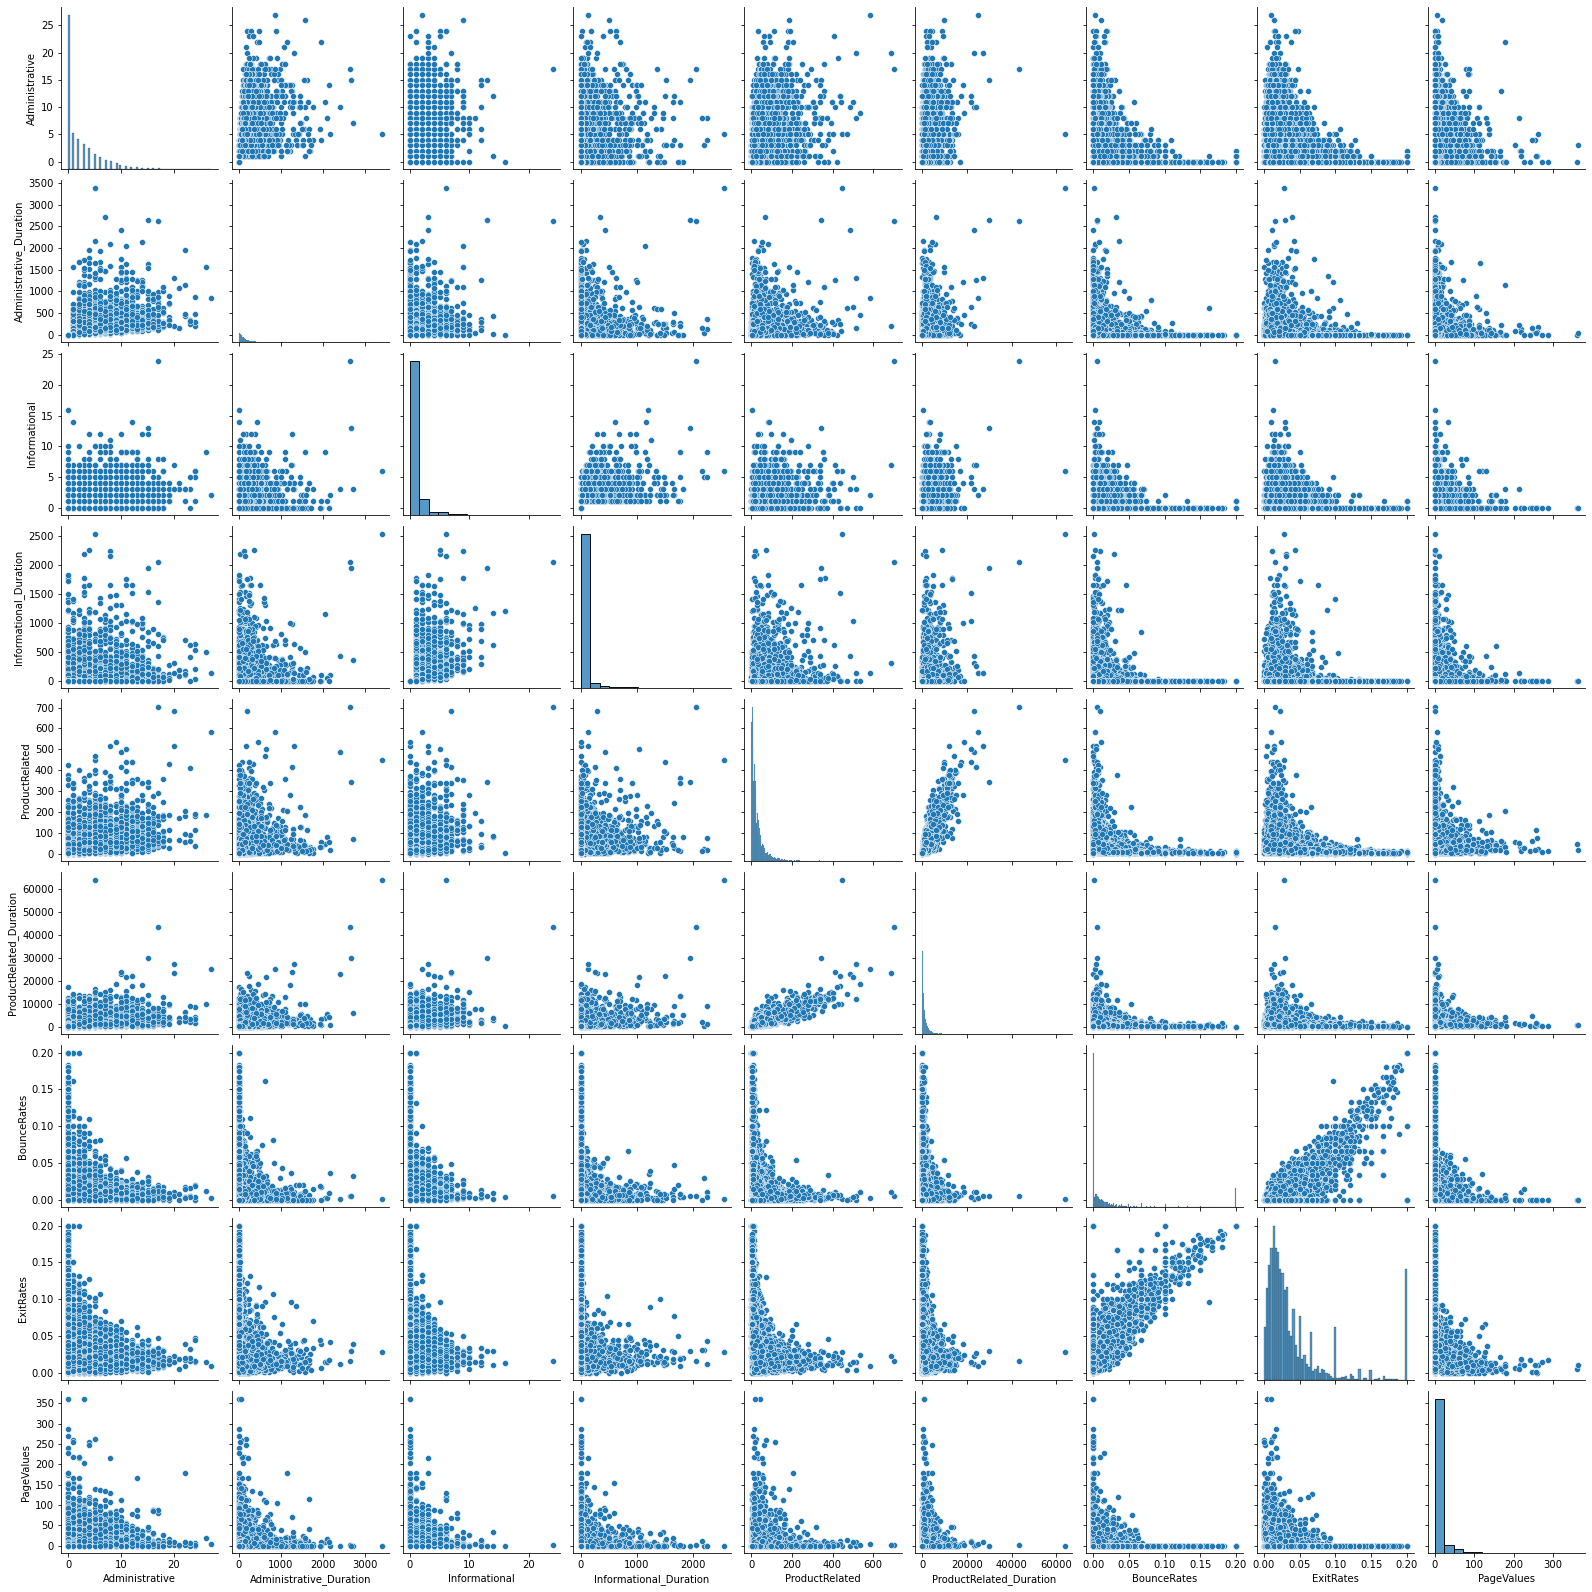

In [19]:
sns.pairplot(df)
plt.show()

### Perform required missing value treatment


In [20]:
df.isnull().sum()

Administrative             0
Administrative_Duration    0
Informational              0
Informational_Duration     0
ProductRelated             0
ProductRelated_Duration    0
BounceRates                0
ExitRates                  0
PageValues                 0
dtype: int64

In [21]:
# no null values found

### Perform Outlier treatment if required


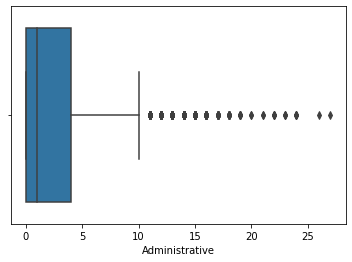

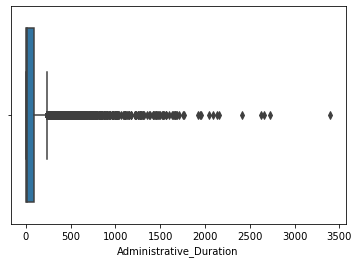

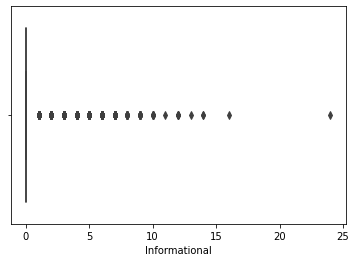

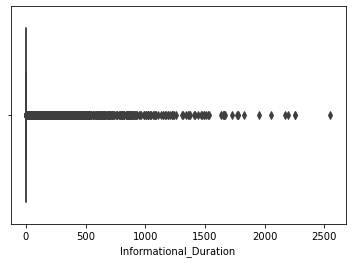

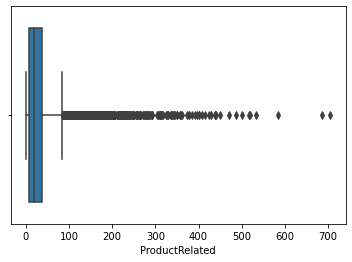

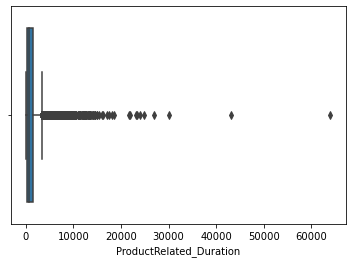

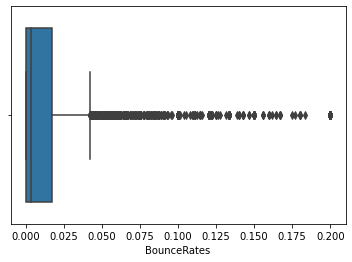

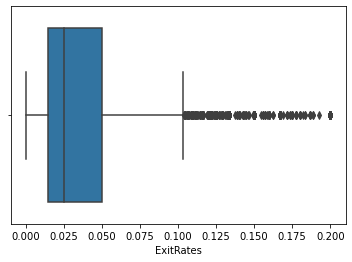

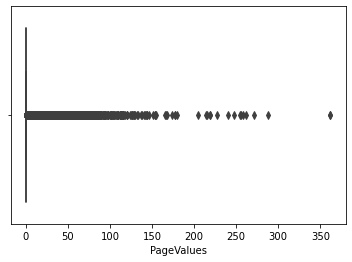

In [22]:
for i in df.columns:
    sns.boxplot(x=df[i])
    plt.show()

In [23]:
# There are high outliers in data

In [25]:
df.shape

(12330, 9)

In [24]:
q1=df.quantile(q=0.25)
q3=df.quantile(q=0.75)

iqr=q3-q1

lower_limit = q1-1.5*iqr

upper_limit = q3+1.5*iqr


df1=df[~((df<lower_limit)|(df>upper_limit)).any(axis = 1)]
df1.shape

(5878, 9)

### Perform appropriate scaling


In [27]:
mm = MinMaxScaler()

In [28]:
df_scaled = pd.DataFrame(mm.fit_transform(df), columns=df.columns)

In [29]:
df_scaled.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues
0,0.0,0.0,0.0,0.0,0.001418,0.000000,1.00,1.00,0.0
1,0.0,0.0,0.0,0.0,0.002837,0.001000,0.00,0.50,0.0
2,0.0,0.0,0.0,0.0,0.001418,0.000000,1.00,1.00,0.0
3,0.0,0.0,0.0,0.0,0.002837,0.000042,0.25,0.70,0.0
4,0.0,0.0,0.0,0.0,0.014184,0.009809,0.10,0.25,0.0


### Build the different cluster models.


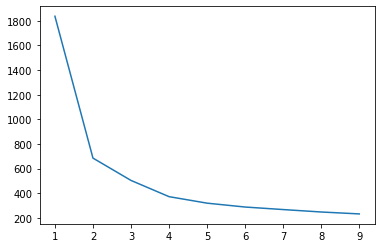

In [33]:
inertia = []
for k in range(1,10):
    km = KMeans(n_clusters=k)
    km.fit(df_scaled)
    inertia.append(km.inertia_)
plt.plot(range(1,10),inertia)
plt.show()

In [34]:
km2 = KMeans(n_clusters=2)
km2.fit(df_scaled)
labels = km2.predict(df_scaled)

In [37]:
silhouette_score(df_scaled,labels)

0.7391839961970151

In [38]:
df_k = df.copy()
df_k['label'] = labels

In [39]:
df_k.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,label
0,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,1
1,0,0.0,0,0.0,2,64.000000,0.00,0.10,0.0,0
2,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,1
3,0,0.0,0,0.0,2,2.666667,0.05,0.14,0.0,0
4,0,0.0,0,0.0,10,627.500000,0.02,0.05,0.0,0


In [40]:
df_k['label'].value_counts() 

0    11295
1     1035
Name: label, dtype: int64

### Analyse the optimum number of cluster using appropriate techniques.


In [42]:
df_k.describe()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,label
count,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000
mean,2.315166,80.818611,0.503569,34.472398,31.731468,1194.746220,0.022191,0.043073,5.889258,0.083942
std,3.321784,176.779107,1.270156,140.749294,44.475503,1913.669288,0.048488,0.048597,18.568437,0.277311
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,7.000000,184.137500,0.000000,0.014286,0.000000,0.000000
50%,1.000000,7.500000,0.000000,0.000000,18.000000,598.936905,0.003112,0.025156,0.000000,0.000000
75%,4.000000,93.256250,0.000000,0.000000,38.000000,1464.157213,0.016813,0.050000,0.000000,0.000000
max,27.000000,3398.750000,24.000000,2549.375000,705.000000,63973.522230,0.200000,0.200000,361.763742,1.000000


### Make the appropriate business interpretation using the cluster centroids.


In [43]:
cluster_2 = df_k[df_k['label']==0]
cluster_2.describe()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,label
count,11295.000000,11295.000000,11295.000000,11295.000000,11295.000000,11295.000000,11295.000000,11295.000000,11295.000000,11295.0
mean,2.522975,88.092395,0.548296,37.623149,34.372554,1299.213851,0.008852,0.030380,6.428911,0.0
std,3.394620,182.866003,1.317272,146.653780,45.547517,1965.783268,0.014629,0.024052,19.310980,0.0
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
25%,0.000000,0.000000,0.000000,0.000000,9.000000,259.000000,0.000000,0.013333,0.000000,0.0
50%,1.000000,19.200000,0.000000,0.000000,20.000000,690.958333,0.001111,0.023394,0.000000,0.0
75%,4.000000,103.600000,0.000000,0.000000,41.000000,1581.494155,0.012200,0.040000,0.000000,0.0
max,27.000000,3398.750000,24.000000,2549.375000,705.000000,63973.522230,0.100000,0.140000,361.763742,0.0


In [44]:
cluster_2 = df_k[df_k['label']==1]
cluster_2.describe()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,label
count,1035.000000,1035.000000,1035.000000,1035.000000,1035.000000,1035.000000,1035.000000,1035.000000,1035.0,1035.0
mean,0.047343,1.439485,0.015459,0.088116,2.909179,54.686422,0.167766,0.181588,0.0,1.0
std,0.286174,22.023092,0.151564,1.520525,4.261685,192.860530,0.050400,0.029587,0.0,0.0
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.096299,0.0,1.0
25%,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.120714,0.160000,0.0,1.0
50%,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.200000,0.200000,0.0,1.0
75%,0.000000,0.000000,0.000000,0.000000,3.000000,18.000000,0.200000,0.200000,0.0,1.0
max,4.000000,613.666667,2.000000,34.200000,71.000000,2251.280000,0.200000,0.200000,0.0,1.0


In [ ]:
# Clustoer 0 : has High Administrative_Duration
# Clustoer 0 : has High ProductRelated_Duration

In [ ]:
# Clustoer 1 : has High ExitRates

### Perform the EDA on cluster groups to understand the cluster characteristics.


In [45]:
centroids = pd.DataFrame(km2.cluster_centers_,columns=df.columns)
centroids

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues
0,0.093444,0.025919,0.022846,0.014758,0.048755,0.020309,0.044259,0.151901,1.777102e-02
1,0.001753,0.000424,0.000644,0.000035,0.004126,0.000855,0.838830,0.907938,6.938894e-18


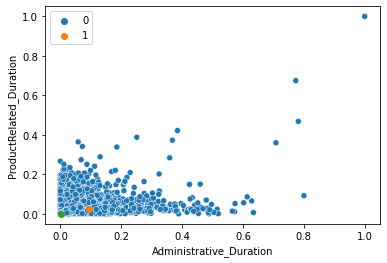

In [47]:
sns.scatterplot(x='Administrative_Duration',y='ProductRelated_Duration',data=df_scaled,hue=list(df_k['label']))
plt.scatter(centroids.iloc[0,0],centroids.iloc[0,1])
plt.scatter(centroids.iloc[1,0],centroids.iloc[1,1])
plt.show()

### Perform PCA and apply clustering on top of it. Comment whether PCA is really helping the clustering process.

In [49]:
from sklearn.decomposition import PCA

In [51]:
model = PCA(n_components=9)
pca_model = model.fit_transform(df_scaled)

In [52]:
model.explained_variance_      # Eigen Values
# varience explained by all the features

array([0.11465497, 0.01689051, 0.00489375, 0.00442086, 0.00284905,
       0.00245893, 0.00160156, 0.00107297, 0.00017551])

In [53]:
total_var_explained = sum(model.explained_variance_ratio_)

In [54]:
total_var_explained

1.0

In [55]:
var_exp_ind = []
for i in sorted(model.explained_variance_, reverse=True):
    print(i/np.sum(model.explained_variance_ )*100)
    var_exp_ind.append(i/np.sum(model.explained_variance_ )*100)

76.94029384844319
11.334535669721985
3.2839940889103016
2.966660068796936
1.911883621162281
1.6500864498034777
1.0747400805404197
0.7200265780396378
0.11777959458177957


In [71]:
model = PCA(n_components=2)
pca_val = model.fit_transform(df_scaled)

In [72]:
km = KMeans(n_clusters=2)
km_v3 = km.fit(pca_val)

In [73]:
silhouette_score(pca_val,km_v3.labels_)

0.7889023304551772

In [ ]:
# PCA helpfull

  
### Also try different graphs to visualize the clusters and its characteristics. 

In [74]:
x_red = pd.DataFrame(model.fit_transform(df_scaled), columns=['PC1', 'PC2'])

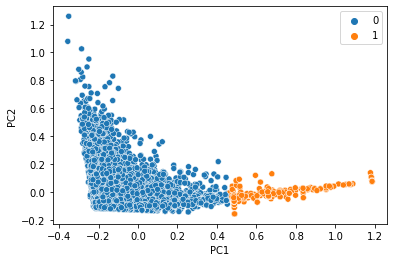

In [77]:
sns.scatterplot(x ='PC1',y='PC2',data=x_red,hue=list(km_v3.labels_))
plt.show()